# K-Nearest-Neighbors

👇 Load the `houses_clean.csv` dataset located in the `data` folder  
Or you can load it directly from this URL: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).  

The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("data/houses_clean.csv")

In [6]:
df

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000
...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,1,175000
1456,0.940904,0.375,0.333333,0.625,1,210000
1457,1.353418,0.500,0.333333,1.000,1,266500
1458,-0.596369,0.250,0.333333,0.625,1,142125


💡 Most features are already preprocessed, or more precisely scaled with a normalization, as you did it during the Data preparation day  

💡 One feature, `GrLiveArea`, is not normalized. We keep it that way to see the impact of its normalization on our model performance later on  

👇 You can easily see this with descriptive statistics, check the min and max    

In [7]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) on such a task.  
❓ What is the proportion of the variance in `SalePrice` that is explained by the features?  
Save your answer in a variable named `base_knn_score`.

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor

In [10]:
X = df.drop("SalePrice", axis = 1)
y = df["SalePrice"]

In [13]:
X.shape, y.shape

((1460, 5), (1460,))

In [14]:
knn_model = KNeighborsRegressor()

cv_results = cross_validate(knn_model, X, y)

In [18]:
base_knn_score = cv_results["test_score"].mean()

### 🧪 Check your code

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/jakob/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jakob/code/jahlah/data_challenges_TA/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_default_score.py::TestDefault_score::test_score PASSED        [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master


# Scale sensitivity

KNNs and distance based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`  
Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

Even though only `GrLiveArea` needs to be normalized, using the MinxMaxScaler on all your features is fine  
    
Indeed, Min-Max Scaling is an [idempotent](https://en.wikipedia.org/wiki/Idempotence) transformation: if $X_{max}=1$ and $X_{min}=0$, then $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

X_rescaled = scaler.fit(X)
X_rescaled = scaler.transform(X)

In [28]:
cv_results = cross_validate(knn_model, X_rescaled, y)

rescaled_score = cv_results["test_score"].mean()

rescaled_score

0.6514912409729618

👉 The R2 score should have increased!

💡 It is preferable for features to be in an exact common range when modeling distance based algorithms.  
However, it does not always guarantee a better score.  
It is a trial and error process.

### 🧪 Check your code

In [29]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/jakob/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jakob/code/jahlah/data_challenges_TA/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
tests/test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master


# Optimizing $k$

👇 Fine tune the parameter K of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 2 until 25.

In [32]:
scores = []
neighbours = []

for k in range(2, 26):
    # instantiate model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # train model on rescaled X
    cv_results = cross_validate(knn_model, X_rescaled, y)
    
    # append the score and k
    scores.append(cv_results["test_score"].mean())
    neighbours.append(k)
    
    

In [35]:
import matplotlib.pyplot as plt

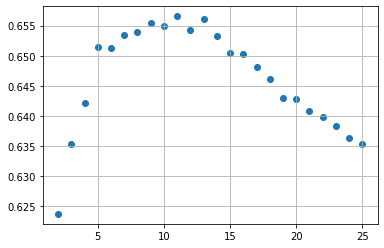

In [43]:
plt.scatter(neighbours, scores)
plt.grid();

In [46]:
neighbours[scores.index(max(scores))]

11

❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

In [47]:
best_k  =neighbours[scores.index(max(scores))]

<details>
<summary> 👉 Solution 👈</summary>
    
By looking at your graph, you should see that the score stops increasing around k = 5 and the maximum score is reached for k = 11.

</details>



❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

<details>
<summary> 👉 Solution 👈</summary>
    
When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

</details>



### 🧪 Check your code

In [48]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/jakob/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jakob/code/jahlah/data_challenges_TA/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED  [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master


# Overfitting a KNN 

💡 When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

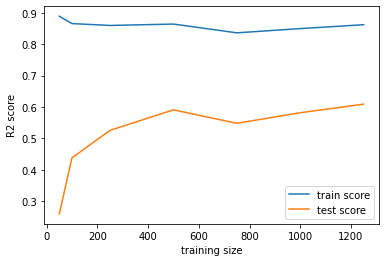

In [64]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=2),
                                                              X = X_rescaled, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = "train score")
plt.plot(train_sizes, test_scores_mean, label = "test score")
plt.xlabel("training size")
plt.ylabel("R2 score")
plt.legend(); 

👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

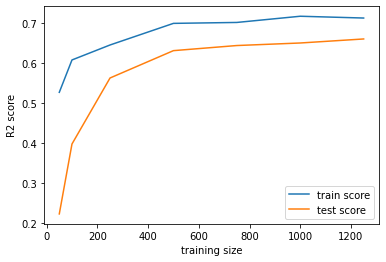

In [65]:
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=11),
                                                              X = X_rescaled, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = "train score")
plt.plot(train_sizes, test_scores_mean, label = "test score")
plt.xlabel("training size")
plt.ylabel("R2 score")
plt.legend(); 

👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

💡 There are two key elements to remember when modelling with KNN models:  
    1. Distance algorithms are extremely sensitive to the scale of features  
    2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

In [77]:
cv_results = cross_validate(KNeighborsRegressor(n_neighbors=best_k), X_rescaled, y, scoring = "neg_mean_absolute_error")

In [83]:
price_error = cv_results["test_score"].mean()

In [86]:
price_error

-30882.88854296389

### 🧪 Check your code

In [84]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/jakob/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jakob/code/jahlah/data_challenges_TA/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_price_error.py::TestPrice_error::test_price_error_range PASSED [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master


# Model Selection

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

<details>
<summary> 💡 Hint </summary>
    
To chose either or, you'll have to evaluate the score of a Linear Regression on the same task and compare it to the score of the KNN. Make sure you are comparing the same metrics!!

</details>




In [87]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression() # Instanciate Linear Regression

cv_results_linear = cross_validate(lin_model, X_rescaled,y, scoring = 'neg_mean_absolute_error') # Cross validate

linear_model_score = cv_results_linear['test_score'].mean()  # Mean of scores

print(linear_model_score)

-33586.16906310636


In [94]:
if abs(price_error) < abs(linear_model_score): 
    best_model = "KNN"
else: 
    best_model = "linear_model"

best_model

'KNN'

💡 When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

### 🧪 Check your code

In [95]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/jakob/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jakob/code/jahlah/data_challenges_TA/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_best_model.py::TestBest_model::test_best_model PASSED         [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master


# 🏁